# Домашнее задание 1

В этом домашнем задании мы немного поупражняемся с обработкой временных данных и базовыми моделями. 

В приложенном файле находится всего один временной ряд. Он представляет из себя срезы некоторых значений, связанных с движениями ликвидности одного крупного российского банка. Требуется построить модель, способную прогнозировать суммарное значение этого ряда за день.

#### Описание бизнес-процесса, связанного с рядом.

Ликвидностью обычно называют высоколиквидные активы, т.е. активы, которые легко купить и продать, чтобы быстро конвертировать в деньги. Собственно, сами по себе деньги это тоже ликвидность. Но ими также могут быть ценные бумаги крупных компаний и деривативы на них. Для банков важно поддерживать некоторый уровень ликвидности, чтобы всегда иметь возможность либо быстро отдать краткосрочные долги. Крупнейшие банковские кризисы во многом состоялись из-за набега вкладчиков, забравших свои деньги, из-за чего банки не могли в моменте обслуживать свои займы. Ликвидные активы можно быстро вложить, если на рынке встретились хорошие условия. Если ликвидности избыток, её можно вложить, а если недостаток -- занять.

Мы хотим прогнозировать сумму (сальдо) поступлений и списаний за день. На основании прогноза позиционер (управляет ликвидностью) принимает решение о выделении средств на размещение на рынке для получения дополнительной прибыли. В случае, если на конец дня образуется профицит ликвидности, его можно разместить в ЦБ (дать в долг) по overnight ставке, равной ключевой-0.9%. В случае, если на конец дня образуется дефицит ликвидности (опасность не вернуть долги), его можно покрыть за счет займа по overnight ставке, равной ключевая+1%. 


## 1) Загрузка данных (0.5 балла)

Загрузите временной ряд. Преобразуйте даты во временных данных. Вам необходимо определить частоту данных, так как от этого будут зависеть параметры модели. Исходя из частоты выберите оффсет [Оффсет](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).Не спешите отвечать на этот вопрос и посмотрите на данные **внимательно**. Сделайте ресэмпл ряда к выбранному оффсету. Если вы всё сделали правильно, то дисперсия ряда должна быть примерно одинаковой на любом участке.

In [153]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

dt = pd.read_csv('/Users/vsevolodparamonov/Downloads/data.csv')
dt.Date = pd.to_datetime(dt.Date)
dt.set_index('Date', inplace=True)

offst = 'D'
dt_r = dt.resample(offst).sum()
dt_r

,Target
Date,
2017-01-09,-0.579194
2017-01-10,-1.082260
2017-01-11,-1.515704
2017-01-12,-1.618853
2017-01-13,-1.450091
...,...
2020-09-13,0.000000
2020-09-14,3.307929
2020-09-15,2.644602


In [154]:
import numpy as np

indx = np.linspace(0, np.random.choice(np.arange(0, dt_r.shape[0])), 3).astype('int')

period1, period2, period3 = dt_r.iloc[0:indx[1]].Target.values, dt_r.iloc[indx[1]:indx[2]].Target.values, dt_r.iloc[indx[1]:].Target.values

print(f'Period {indx[0]} to {indx[1]} VAR: {np.var(period1)}')
print(f'Period {indx[1]} to {indx[2]} VAR: {np.var(period2)}')
print(f'Period {indx[2]} to {dt_r.shape[0]} VAR: {np.var(period3)}')


Period 0 to 180 VAR: 0.4179487825554126
Period 180 to 361 VAR: 0.5048154631575223
Period 361 to 1348 VAR: 2.386421813433346


> #### **<div style='color: red'> Вывод: </div>**
>
> #### Был выбран оффсет в день, так как в конце датафрейма были обнаружены данные лишь за один день и следует экстраполировать данные для корректного анализа
>
> #### Что касается дисперсии, получилось так, что она одинаковая только если временной промежуток не включает момент, в который произошел структурный сдвиг

## 2) Визуальный анализ (0.5 балла)

Изобразите временной ряд, его автокорреляции и частные автокорреляции до порядка, который сочтёте нужным.

Что вы можете сказать о структуре ряда? Присутствует ли в нём тренд? Сезонность? Цикличность? Стационарность? Как эти особенности могут помочь прогнозировать?  Ответьте на **каждый** вопрос. 

Хинт: если построить коррелограммы на приращениях ряда, а не на исходных величинах, то некоторые паттерны видны лучше.


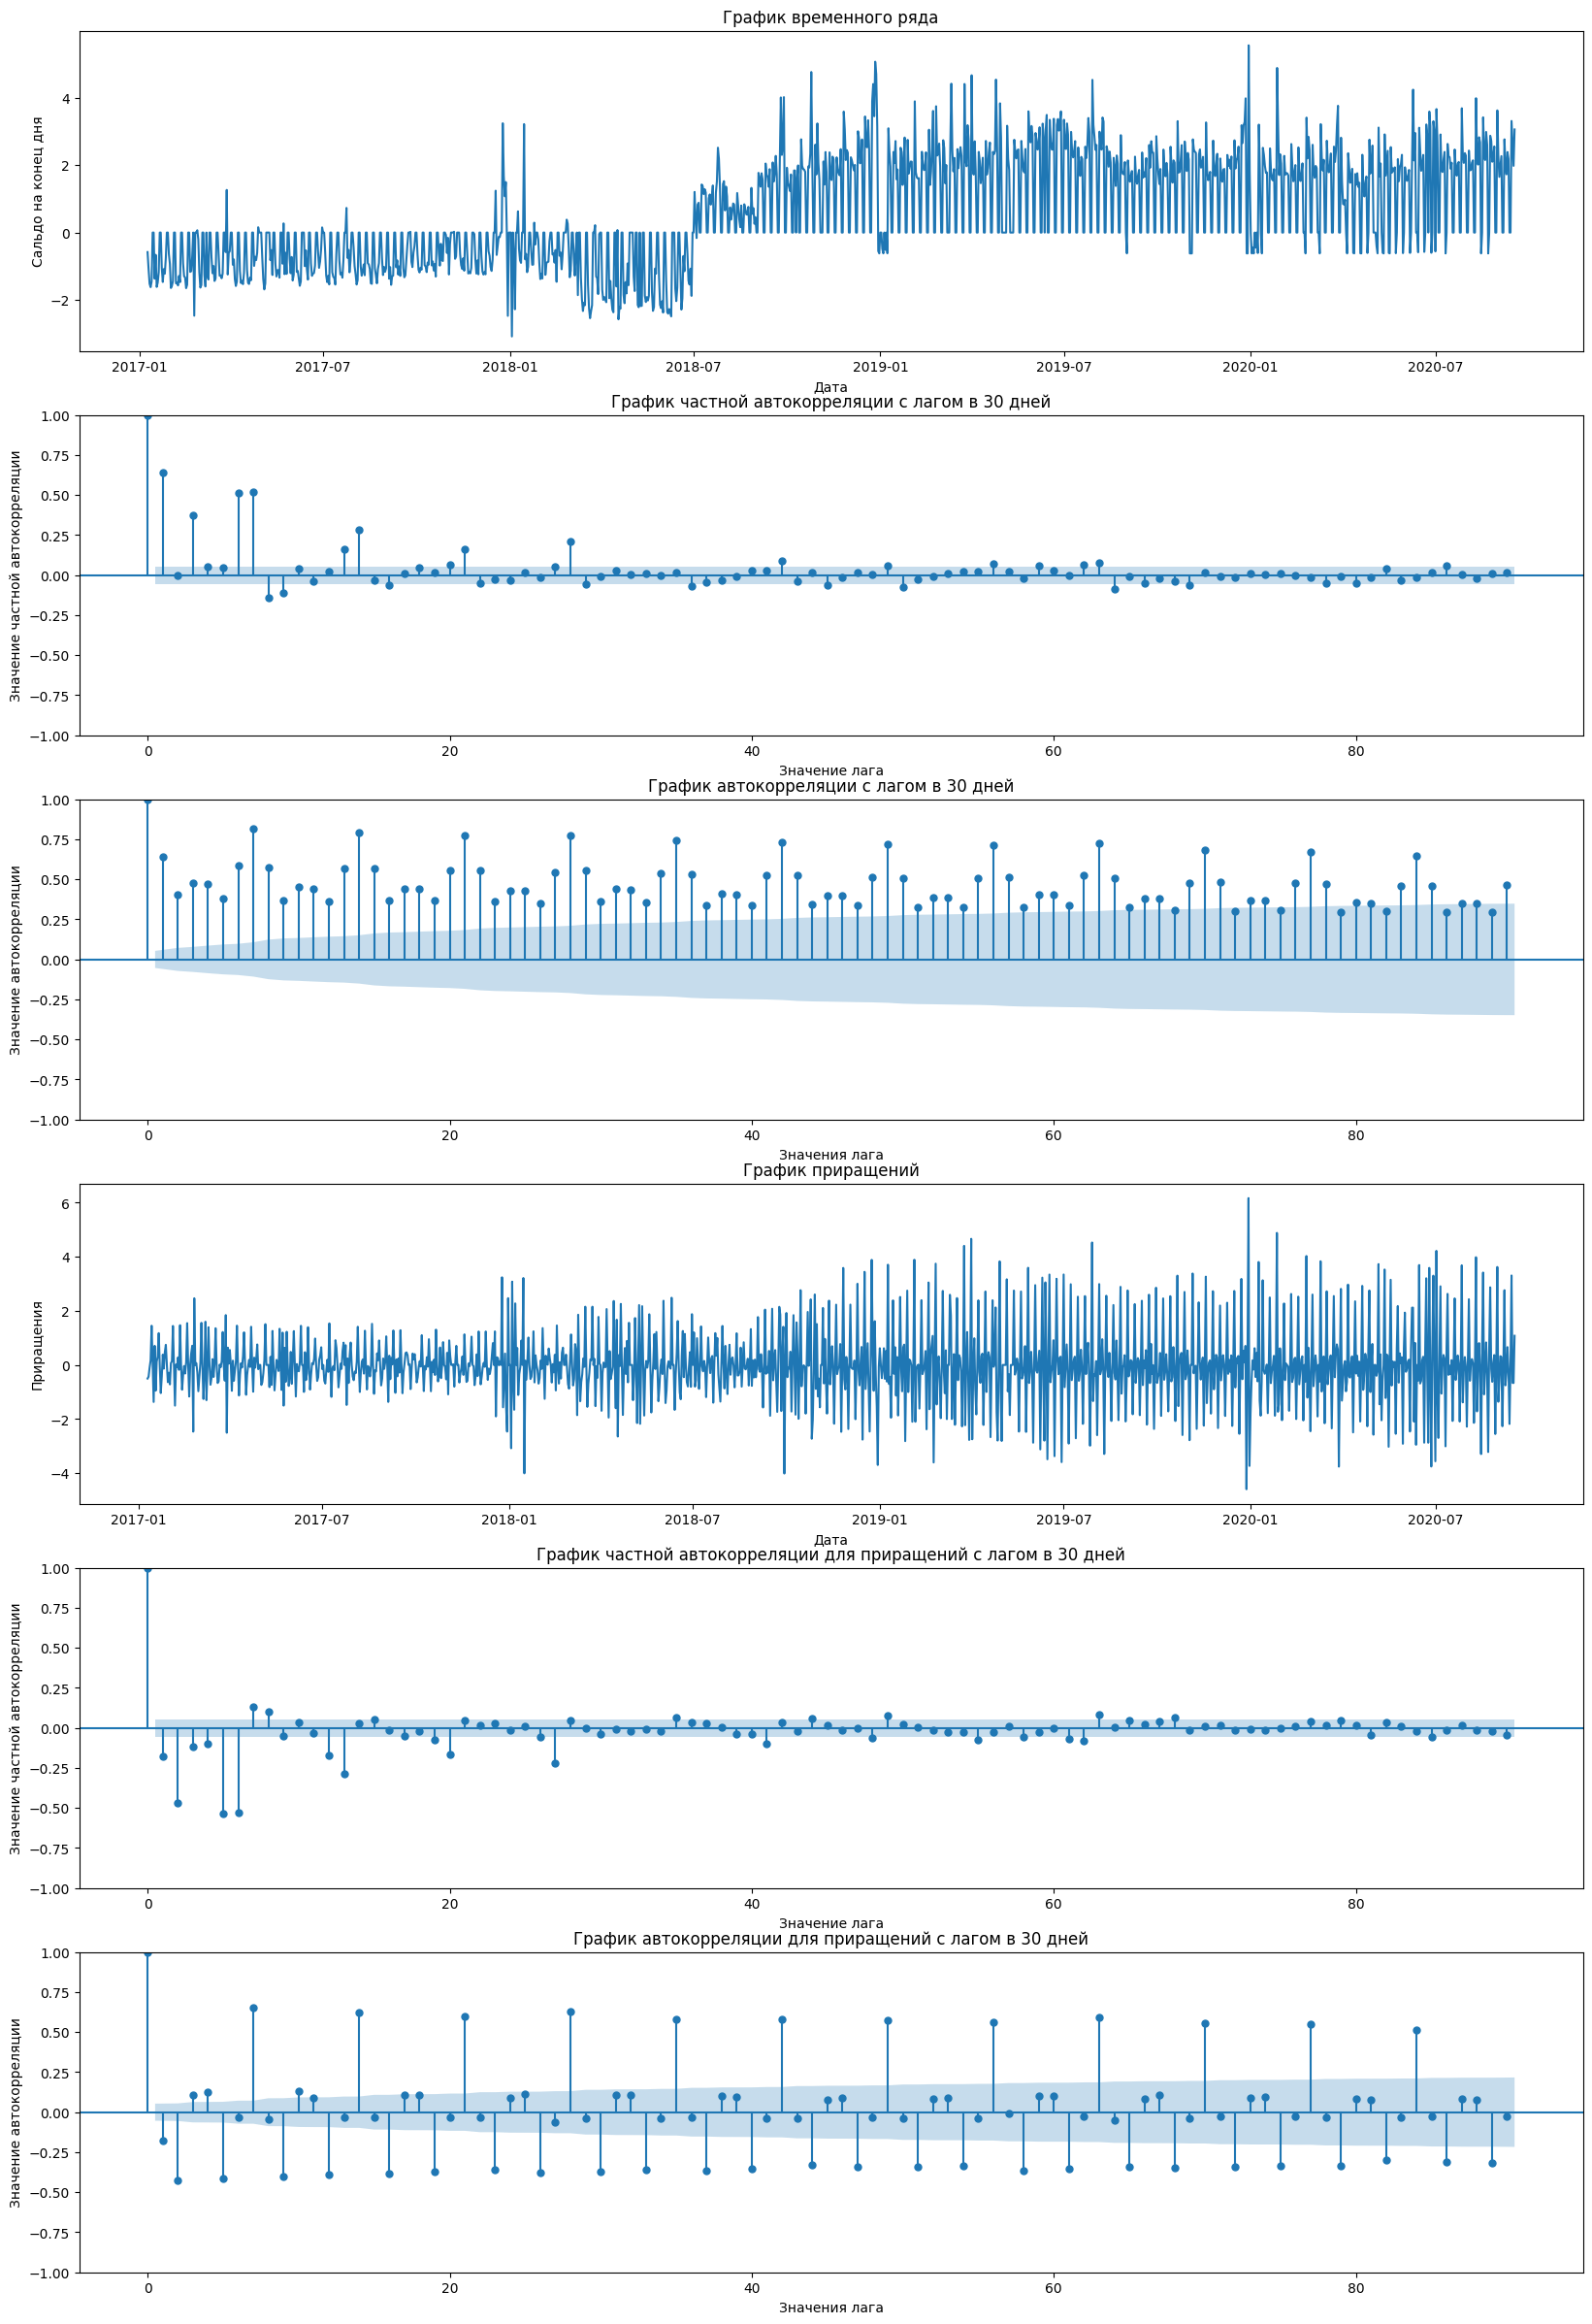

In [155]:
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sktime.utils.plotting import plot_correlations

f, ax = plt.subplots(6,1,figsize=(20,30))

ax[0].plot(dt_r.index, dt_r.Target)
ax[0].set_title('График временного ряда')
ax[0].set_ylabel('Сальдо на конец дня')
ax[0].set_xlabel('Дата')

plot_pacf(dt_r, lags=90, ax=ax[1])
ax[1].set_title('График частной автокорреляции с лагом в 30 дней')
ax[1].set_xlabel('Значение лага')
ax[1].set_ylabel('Значение частной автокорреляции')

plot_acf(dt_r, lags=90, ax=ax[2])
ax[2].set_title('График автокорреляции с лагом в 30 дней')
ax[2].set_xlabel('Значения лага')
ax[2].set_ylabel('Значение автокорреляции')

ax[3].plot(dt_r.diff().dropna())
ax[3].set_title('График приращений')
ax[3].set_xlabel('Дата')
ax[3].set_ylabel('Приращения')

plot_pacf(dt_r.diff().dropna(), lags=90, ax=ax[4])
ax[4].set_title('График частной автокорреляции для приращений с лагом в 30 дней')
ax[4].set_xlabel('Значение лага')
ax[4].set_ylabel('Значение частной автокорреляции')

plot_acf(dt_r.diff().dropna(), lags=90, ax=ax[5])
ax[5].set_title('График автокорреляции для приращений с лагом в 30 дней')
ax[5].set_xlabel('Значения лага')
ax[5].set_ylabel('Значение автокорреляции');

> ### **<div style='color:red'> Вывод: </div>**
>
> #### _**Структура ряда**_
>
> * #### На графике временного ряда видно, что произошел структурный сдвиг: после сдвига сальдо в большей степени принимает положительные значения
>
> #### _**Тренд**_
>
> * #### Вероятнее всего в данном ряде нету какого-либо тренда, поскольку не заметно какое-либо плавное изменение значений с течением времени
>
> #### _**Сезонность**_
>
> * #### На графике временного ряда точно видна сезонность. Например, каждый день январь происходит какой-то аномальный скачок в данных
>
> #### _**Цикличность**_
>
> * #### На графиках автокорреляции и частной автокорреляции четко прослеживаются периоды, которые коррелируют с $y_t$. Например $y_{t-1}, y_{t-3}, y_{t-7}$ и тд имеют наибольшие значения корреляции. Я также выбрал окно размером 90, так как это соответсвует одному кварталу и данный временной лаг больше всего подходит для анализа влияния различных факторов на сальдо
>
> #### _**Стационарность**_
>
> * #### Нельзя говорить про стационарность ряда в целом, но можно сказать, что временные ряды до и после структурного сдвига стационарны по отдельности. Можно сказать, что они стационарны в широком смысле, т.к. на этих промежутках матож и дисперсия конечны, не зависят от t, а ковариационная функция действительно зависит от временного сдвига
>
> #### _**Как эти особенности могут помочь в прогнозировании?**_
>
> * #### В данных присутствуют факторы, которые будут мешать прогнозиованию, такие как структурный двиг. Сезоннсть и цикличность по факту тоже могут ухудшать прогнозы, но создание переменных, которые учитывают данные особенности, позволяет скорректировать прогнозы для таких случаев. Стационарность хорошее свойство, которое характеризует некоторое "постоянство" в данных, что делает прогнозы более корректными  


## 3) Генерация признаков (3 балла)
Во временных рядах очень важно избегать утечек в данных (data leak). Их легко допуситть при неаккуратной генерации признаков. Например, если вы для прогноза $y_t$ будете исплользовать фичу разности $y_t - y_{t-1}$. Будьте осторожны и внимательны.

**Внимание!** При наличии хотя бы одной утечки в данном блоке стоимость всех пунктов делится на 2, кроме бонусного. Итого максимальный балл при наличии утечек равен 1.5 (или 2.5 при сделанном бонусе). 


Создайте следующие признаки. Не забудьте лагировать необходимые фичи. Календарные фичи утечками не являются и могут даже заглядывать в будущее. Фичи с утечками не засчитываются. Выбор каждой фичи необходимо обосновать. Фичи без обоснования не засчитываются.

1) (0.75 балла) Календарные фичи. Придумайте не менее пяти фичей из календаря. Выбор каждой обоснуйте.
2) (0.15 балла) Структурный сдвиг. В середине ряда явно есть структурное изменение. Попробуйте придумать фичу, которая бы помогла это учесть.
3) (1 балл) Бонус! Одна из важных календарных фичей наряду с праздниками -- налоговые (бухгалтерские) дни. Найти их в удобном для чтения формате весьма проблемно, придётся парсить, но это весьма сильная фича. Код парсинга (или описание того, как вы их выкачивали) необходимо приложить, иначе пункт не засчитывается.
4) (0.1 балла) Лаги таргета.  (до 5 разных). Выбор каждого лага обоснуйте.

5) Экзогенные фичи (по 0.5 балла каждый пункт):
<ul>
<li>Значение ключевой ставки. Можно поискать на сайте ЦБ</li>
<li>Обменнык курс доллара. Тоже есть на сайте ЦБ либо в любом другом источнике. Например. YahooFinance</li>
<li>Спред ставок MosЗrime, все 7 показателей. Ставка MosPrime -- ставка кредитования в рублях на межбанковском рынке России. Спред -- разница между ставками кредита и депозита. У mosprime есть свой сайт.</li>
</ul>

6) Придумайте сами 2 фичи, которые считаете необходимыми (по 0.25 за каждую). Выбор каждой фичи обоснуйте.

> ### <div style='color:red'> 1. Календарные фичи </div>
>
> * #### **День недели:** данный признак позволит учесть взаимосвязь между целевой переменной и днем недели, потому что возможно в разные рабочие дни возможна разная активность на рынке
> * #### **Месяц:** по аналогии с днем недели, каждый месяц может по-своему влиять на деловую активность на рынке, что непосредственно влияет на значение сальдо
> * #### **Год:** данный признак может отвечать за структурные изменения в поведении акционеров, ведь каждый год происходят какие-то ключевые изменения 
> * #### **$ sin(\frac{\pi}{6} * month)$:** данный признак позволяет учесть ежегодную январную цикличность, про которую было описано в предыдущем задании
> * #### **Является ли день праздничным:** в праздничные дни стоит ожидать изменение в поведении акционеров (возможно, не все проявляют излишнюю заинтересованность на рынке)


> #### **Значение скользящего окна за 30 предыдущих дней:** достаточно простой признак, позволяющий учитывать предыдущие значения целевой переменной (не относится к календарным фичам, просто указываю на факт добавление данного признака)


In [156]:
from sktime.transformations.series.holiday import CountryHolidaysTransformer

###  День недели ###
dt_r['DoW'] = dt_r.index.day_of_week

### Месяц ###
dt_r['Month'] = dt_r.index.month

### Год ###
dt_r['Year'] = dt_r.index.year

### Является ли день праздничным ###
dt_r['is_holiday'] = CountryHolidaysTransformer("RUS").fit_transform(dt_r)['RUS_holidays'].values

#################################################################
### Дропаем выходные дни перед подсчетом скользящего среднего ###
#################################################################

dt_r = dt_r[~dt_r.DoW.isin([5,6])]

### Скользящее окно ###
dt_r['MA'] = dt_r.Target.shift().rolling(30).mean()

> ### <div style='color:red'> 2. Структурный сдвиг </div>
>
> #### На графике временного ряда видно, что структурный сдвиг начинается в начале июля, поэтому создадим дамми-переменную, что месяц наблюдения больше 7 (июля)

In [157]:
dt_r['is_anomaly'] = (dt_r.Month >= 7) * 1

> ### <div style='color:red'> 3. Налоговые дни </div>
>
> #### 

In [158]:
import requests
from bs4 import BeautifulSoup

headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:101.0) Gecko/20100101 Firefox/101.0'
    }

years = np.arange(dt_r.Year.min(), dt_r.Year.max()+1)

tax_day = []

for i in years:

    url = f'https://www.b-kontur.ru/calendar/{i}'

    response = requests.get(url, headers=headers)
    gett = BeautifulSoup(response.content, 'html.parser')

    all_times = gett.find_all('time')

    for j in all_times:

        try:

            line_with_date = j['datetime']

            if 'undefined' in line_with_date:

                line_with_date = line_with_date.replace('undefined', f'{i}')
                tax_day.append(line_with_date)

        except:

            pass

tax_day = pd.DataFrame({'Date':tax_day, 'is_Tax': np.full(len(tax_day), 1)})
tax_day.Date = tax_day.Date.astype('datetime64[ns]')
tax_day

,Date,is_Tax
0,2017-01-16,1
1,2017-01-20,1
2,2017-01-25,1
3,2017-01-30,1
4,2017-02-01,1
...,...,...
191,2020-11-25,1
192,2020-11-30,1
193,2020-12-15,1
194,2020-12-25,1


> ### <div style='color:red'> 4. Лаги таргета </div>
>
> #### Я выбрал следующие лаги: 1, 3, 7, 14, 22
> #### Поскольку они больше всего коррелируют с целевой переменной (т.е. с $y_t$)

In [159]:
lags = [1, 3, 7, 14, 22]

for i in lags:

    dt_r[f'LAG_{i}'] = dt_r.Target.shift(i)

dt_r

,Target,DoW,Month,Year,is_holiday,MA,is_anomaly,LAG_1,LAG_3,LAG_7,LAG_14,LAG_22
Date,,,,,,,,,,,,
2017-01-09,-0.579194,0,1,2017,False,NaN,0,NaN,NaN,NaN,NaN,NaN
2017-01-10,-1.082260,1,1,2017,False,NaN,0,-0.579194,NaN,NaN,NaN,NaN
2017-01-11,-1.515704,2,1,2017,False,NaN,0,-1.082260,NaN,NaN,NaN,NaN
2017-01-12,-1.618853,3,1,2017,False,NaN,0,-1.515704,-0.579194,NaN,NaN,NaN
2017-01-13,-1.450091,4,1,2017,False,NaN,0,-1.618853,-1.082260,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11,2.180332,4,9,2020,False,2.431621,1,2.385552,2.008578,1.650176,2.869745,2.014495
2020-09-14,3.307929,0,9,2020,False,2.428274,1,2.180332,1.726324,1.973185,2.720750,2.824113
2020-09-15,2.644602,1,9,2020,False,2.457544,1,3.307929,2.385552,2.265766,2.097735,2.675739


> ### <div style='color:red'> 5. Экзогенные фичи </div>
>
> ### **Значение ключевой ставки ЦБ**

In [160]:
min_time, max_time =  sorted(dt_r.index)[0], sorted(dt_r.index)[-1]

min_date_y, min_date_m, min_date_d = min_time.year, min_time.month, min_time.day
max_date_y, max_date_m, max_date_d = max_time.year, max_time.month, max_time.day


url = f'https://cbr.ru/hd_base/KeyRate/?UniDbQuery.Posted=True&UniDbQuery.From=0{min_date_d}.0{min_date_m}.{min_date_y}&UniDbQuery.To={max_date_d}.{max_date_m}.{max_date_y}'

response = requests.get(url, headers=headers)
gett = BeautifulSoup(response.content, 'html.parser')

all_rates = gett.find_all('div', {'class':'table-wrapper'})[0].find_all('table', {'class':'data'})[0].find_all('td')

dates = [all_rates[i].text for i in range(0,len(all_rates), 2)]
rates = [all_rates[i].text for i in range(1,len(all_rates), 2)]

rates_and_dates = pd.DataFrame({'Date': dates, 'Rate': rates})
rates_and_dates.Date = rates_and_dates.Date.astype('datetime64[ns]')
rates_and_dates

,Date,Rate
0,2024-02-22,"16,00"
1,2024-02-21,"16,00"
2,2024-02-20,"16,00"
3,2024-02-19,"16,00"
4,2024-02-16,"16,00"
...,...,...
1784,2017-01-13,"10,00"
1785,2017-01-12,"10,00"
1786,2017-01-11,"10,00"
1787,2017-01-10,"10,00"


> ### **Курс доллара**

In [161]:
import numpy as np
from IPython.display import clear_output
import time

master_data_cur = pd.DataFrame(columns=['Date', 'Currency', 'Price'])


for i in sorted(dt_r.index):

    day = f'0{i.day}' if i.day <= 9 else f'{i.day}'
    month = f'0{i.month}' if i.month <= 9 else f'{i.month}'
    year = i.year

    url = f'https://cbr.ru/curreNcy_base/daily/?UniDbQuery.Posted=True&UniDbQuery.To={day}.{month}.{year}'

    response = requests.get(url)
    gett = BeautifulSoup(response.content, 'html.parser')

    all_curr = gett.find_all('table')[0].find_all('td')

    cur = [all_curr[i].text for i in range(1, len(all_curr), 5)]
    price = [all_curr[i].text for i in range(4, len(all_curr), 5)]
    
    cur_n_price = pd.DataFrame({'Price': price, 'Currency': cur, 'Date': np.full(len(price), i)})
    cur_n_price = cur_n_price[cur_n_price.Currency == 'USD'].reset_index().drop('index', axis=1)

    master_data_cur = pd.concat([master_data_cur, cur_n_price])


    clear_output(True)
    display(master_data_cur)

,Date,Currency,Price
0,2017-01-09,USD,"60,6569"
0,2017-01-10,USD,"59,8961"
0,2017-01-11,USD,"59,9533"
0,2017-01-12,USD,"60,1614"
0,2017-01-13,USD,"59,4978"
...,...,...,...
0,2020-09-11,USD,"75,5274"
0,2020-09-14,USD,"74,8896"
0,2020-09-15,USD,"74,7148"
0,2020-09-16,USD,"75,1884"


> ### **Ставка MosPrime**

In [162]:
url = f'https://mosprime.com/archive?date_from={min_date_y}-{min_date_m}-{min_date_d}&date_to={max_date_y}-{max_date_m}-{max_date_d}&contributor='

response = requests.get(url, headers=headers)
gett = BeautifulSoup(response.content, 'html.parser')
mosprime = gett.find_all('table', {'class':'table table-bordered table-condensed arch-table rrr matrix-table_'})[0]

all_th = mosprime.find_all('th')

dates_mp = [all_th[i].text.strip() for i in range(8, len(all_th))]
rates = np.array([mosprime.find_all('td')[i].text.strip() for i in range(len(mosprime.find_all('td')))]).reshape(len(mosprime.find_all('td'))//7, 7)

dt_mosprime = pd.DataFrame(rates, columns=[all_th[1].text.strip(), all_th[2].text.strip(), 
                                    all_th[3].text.strip(), all_th[4].text.strip(), all_th[5].text.strip(),
                                    all_th[6].text.strip(), all_th[7].text.strip()])

dt_mosprime['Date'] = dates_mp
dt_mosprime.Date = dt_mosprime.Date.astype('datetime64[ns]')
dt_mosprime

,0N,1W,2W,1M,2M,3M,6M,Date
0,4.42,4.46,4.46,4.50,4.55,4.63,4.66,2020-09-17
1,4.41,4.46,4.46,4.50,4.55,4.63,4.66,2020-09-16
2,4.37,4.45,4.45,4.50,4.55,4.63,4.66,2020-09-15
3,4.36,4.44,4.44,4.49,4.55,4.63,4.66,2020-09-14
4,4.36,4.45,4.46,4.50,4.56,4.65,4.67,2020-09-11
...,...,...,...,...,...,...,...,...
903,"10,27","10,40","10,45","10,51","10,58","10,59","10,59",2017-01-13
904,"10,23","10,42","10,48","10,53","10,59","10,59","10,59",2017-01-12
905,"10,23","10,40","10,48","10,53","10,59","10,59","10,59",2017-01-11
906,"10,21","10,40","10,48","10,53","10,59","10,59","10,59",2017-01-10


> ### **<div style='color: red'>6. 2 дополнительные фичи</dev>**
>
> #### **Ставка RUONIA:** данный показатель отражает наличие дефицита / профицита ликвидности на рынке, что может непосредственно повлиять на сальдо поступлений / списаний за день, таким образом влияя на прогноз акционера (принятие решения о выделении средств на размещение на рынке для получения дополнительной прибыли в зависимости от текущей ситуации с ликвидностью)
>
> #### **Объем сделок RUONIA:** также отражает активность на рынке и спрос на краткосрочные финансовые инструменты. Высокий объем сделок RUONIA может свидетельствовать о более высокой ликвидности и уверенности участников рынка в краткосрочных операциях. Является неплохим дополнением к ставке RUONIA

In [163]:
url = f'https://cbr.ru/hd_base/ruonia/dynamics/?UniDbQuery.Posted=True&UniDbQuery.From=0{min_date_d}.0{min_date_m}.{min_date_y}&UniDbQuery.To={max_date_d}.{max_date_m}.{max_date_y}'

response = requests.get(url, headers=headers)
gett = BeautifulSoup(response.content, 'html.parser')
ruonia = gett.find_all('table', {'class':'data'})[0].find_all('tr')
ruonia_names = ['Date', ruonia[0].find_all('th')[1].text.strip(), ruonia[0].find_all('th')[2].text.strip()]

ruon = []
for line in ruonia[1:]:

    line = line.find_all('td')

    ruon.append([line[0].text, line[1].text, line[2].text])

ruonia = pd.DataFrame(ruon, columns=ruonia_names)
ruonia.Date = ruonia.Date.astype('datetime64[ns]')
ruonia

,Date,"Ставка RUONIA, %","Объем сделок RUONIA, млрд руб."
0,2024-02-21,"15,75","455,56"
1,2024-02-20,"15,75","382,78"
2,2024-02-19,"15,74","514,80"
3,2024-02-16,"15,74","513,94"
4,2024-02-15,"15,75","415,37"
...,...,...,...
1743,2017-01-13,"10,06","114,31"
1744,2017-01-12,"9,93","129,57"
1745,2017-01-11,"9,97","165,50"
1746,2017-01-10,"9,93","288,00"


> ### **Добавление новых фичей к исходной таблице с данными**

In [164]:
dt_r = dt_r.merge(master_data_cur, on='Date', how='left')
dt_r = dt_r.merge(dt_mosprime, on='Date', how='left')
dt_r = dt_r.merge(rates_and_dates, on='Date', how='left').drop('Currency', axis=1)
dt_r = dt_r.merge(tax_day, on='Date', how='left')
dt_r = dt_r.merge(ruonia, on='Date', how='left')


dt_r.is_Tax.fillna(0, inplace=True)

dt_r = dt_r[dt_r.isna().sum(axis=1) == 0]

for i in list(dt_r.columns[13:22]) + list(dt_r.columns[23:]):

    dt_r[i] = dt_r[i].apply(lambda x: x.replace(',', '.'))

dt_r['0N'] = dt_r['0N'].replace('-', np.nan)

dt_r[dt_r.columns[1:]] = dt_r[dt_r.columns[1:]].astype('float')

dt_r['0N'] = dt_r['0N'].interpolate()

In [165]:
### Сделал так, чтобы парсинг заново каждый раз не запускать ###
dt_r.to_csv('/Users/vsevolodparamonov/Downloads/full_data.csv')

## 4) Одношаговое прогнозирование (1 балл)

Внимание! Запрещается пользоваться функцией make_reduction из sktime. Пункты Регрессия и Бенчмарк не будут засчитаны! 

#### 4.1) Предобработка (0.3 балла)

Разбейте полученные данные на трейн и тест по времени. Размер теста: 0.2. Если необходимо, отнормируйте данные. Если необходимо, закодируйте категориальные фичи любым валидным методом.

In [236]:
data = pd.read_csv('/Users/vsevolodparamonov/Downloads/full_data.csv', index_col=0).drop('Date', axis=1)
data.reset_index(drop=True, inplace=True)

In [237]:

from sktime.forecasting.model_selection import temporal_train_test_split

X, y = data.drop('Target', axis=1), data.Target

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=int(0.3 * data.shape[0]))



#### 4.2) Регрессия (0.3 балла)

Выберите ваш любимый регрессор и решите задачу одношагового прогнозирования. При необходимости подберите гиперпараметры. Кросс-валидацию мы ещё пройти не успели, поэтому можно отбирать параметры на тесте, держа в голове, что так делать не очень хорошо. Подсчитайте качество одношаговых прогнозов. В качестве метрики используйте WAPE. 

$$WAPE=\frac{\sum_{t=1}^n\left|A_t-F_t\right|}{\sum_{t=1}^n\left|A_t\right|}, \quad A_t - Actual, F_t - Forecast$$

In [168]:
from catboost import  CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit


def WAPE(actual_values, forecast_values):
    numerator = sum(abs(a - f) for a, f in zip(actual_values, forecast_values))
    denominator = sum(abs(a) for a in actual_values)
    
    if denominator == 0:
        return 0  
    
    return numerator / denominator


cb = CatBoostRegressor()
cb_preds = []

params = {"depth" : [5, 7, 9, 10],
          "n_estimators" : [100, 200, 300],
          "learning_rate": [0.1, 0.1, 0.5]}

best_model = GridSearchCV(cb, params, scoring = WAPE, cv=TimeSeriesSplit(n_splits = 5))
best_model.fit(X_train, y_train, verbose=0)

X_train_ = X_train.copy()
y_train_ = pd.DataFrame(y_train).copy()

cb = CatBoostRegressor(verbose=False)


for i in range(X_test.shape[0]):

    cb.fit(X_train_, y_train_)

    new_object = X_test.iloc[i]
    cb_preds.append(cb.predict(new_object))

    X_train_.loc[y_train_.shape[0] + i + 1] = new_object
    y_train_.loc[y_train_.shape[0] + i + 1] = y_test.iloc[i]

    


print(f'WAPE: {WAPE(y_test, cb_preds)}')

WAPE: 0.15650512352267598


#### 4.3) Бенчмарк (0.3 балла)

Постройте прогноз с помощью наивной модели. Наивная модель в качестве прогноза возвращает последнее доступное на текущий момент значение из трейна. Подсчитайте качество такого прогноза и сравните с вашей моделью. Если вы всё сделали правильно, то должно получиться как минимум не хуже. С налоговыми датами почти наверное получится лучше.




In [169]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

naive_predict = np.insert(y_test.values[:-1], 0, y_train.values[-1])

print(f'WAPE: {WAPE(y_test, naive_predict)}')

WAPE: 0.2244236834736871


#### 4.4) Визуализация (0.1 балла)

Визуализируйте на одном графике тестовые данные, прогноз вашей модели и прогноз наивной модели. Подпишите все оси.

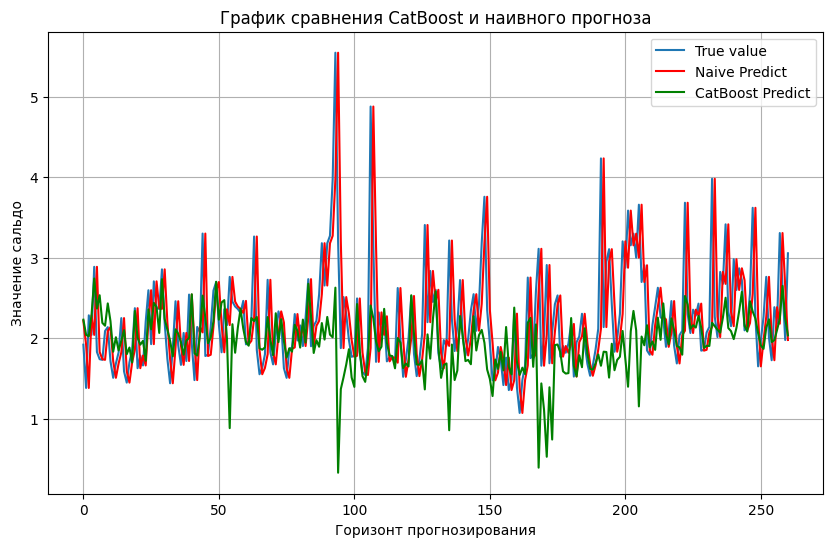

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y_test.reset_index(drop=True).values, label='True value')
plt.plot(naive_predict, color='r', label='Naive Predict')
plt.plot(best_model.predict(X_test), label='CatBoost Predict', color='green')

plt.title('График сравнения CatBoost и наивного прогноза')
plt.xlabel('Горизонт прогнозирования')
plt.ylabel('Значение сальдо')

plt.legend()
plt.grid();

## 5) Многошаговое прогнозирование


Описание всех необходимых стратегий есть в [Конспекте](https://github.com/Pyatachokk/hse_ts_course/blob/master/2024-spring/seminars/sem_02_tables.pdf)

#### 5.1) Повтор препроцессинга (0 баллов)

Вернёмся к полному датасету. Повторите разбиение на трейн и тест. Возьмём в качестве теста последние 50 наблюдений. Соответственно, горизонт прогнозирования будет равен 50. Для упрощения задачи уберём все экзогенные переменные из датасета, которые нужно прогнозировать. Оставим только лаги таргета, календарные фичи и придуманные вами фичи если их не надо прогнозировать. Повторите нормирование и энкодинг, если делали их ранее и если это необходимо. 

In [238]:
feats = np.array(['LAG_1', 'LAG_3', 'LAG_7', 'LAG_14', 'LAG_22', 'DoW', 'Month', 'Year', 'is_holiday', 'is_Tax', 'is_anomaly', 'Target', 'MA'])

data_new = data[feats]

X, y = data_new.drop('Target', axis=1), data_new.Target


y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=50)

#### 5.2) Рекурсивная стратегия (2 балла)

Внимание! Внимание! Запрещается пользоваться готовыми функциями. Рекурсивную стратегию необходимо написать вручную!

 Реализуйте рекурсивное прогнозирование на 50 шагов с помощью вашей любимой регрессионной модели.

> ### **<div style='color:red'>Описание рекурсивной стратегии</div>**
>
> #### Допустим, что у нас есть обучающая выборка до момента t. Тогда она выглядит следующим образом
>
> <center>
> 
>| $Y_t$ | $Y_{t-1}$ | $Y_{t-3}$ | $Y_{t-4}$ | $X_{t}$ |
>|-------|-----------|-----------|-----------|---------|
>| $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
>| $y_{t-1}$ | $y_{t-2}$ | $y_{t-4}$ | $y_{t-5}$ | $x_{t-1}$ |
>| $y_t$ | $y_{t-1}$ | $y_{t-3}$ | $y_{t-4}$ | $x_{t}$ |
>
> </center>
>
> #### где $Y_{t-i}$ - лаговое значение целевой переменной, $i \isin \{1,3,7,14 \} $. На каждой итерации будем делать прогноз и использовать его в качестве лагового значения. Тогда рекурсивная стратегия выглядит следующим образом:
>
> <center>
>
>| $\hat Y_t$ | $Y_{t-1}$ | $Y_{t-3}$ | $Y_{t-4}$ | $X_{t-1}$ |
>|-------|-----------|-----------|-----------|---------|
>| $\hat y_{t+1}$ | $y_t$ | $y_{t-2}$ | $y_{t-3}$ | $x_{t}$ |
>| $\hat y_{t+2}$ | $\hat y_{t+1}$ | $\hat y_{t}$ | $y_{t-1}$ | $x_{t+1}$ |
>| $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
>
> </center>
>
> #### В признаке $X_{t-1}$ мы подразумеваем, что для предсказания $y_{t+h}$ мы знаем значения признаков $x_{t+h-1}$ и нам не нужно предсказывать их значения. Под признаками $x_{t+h-1}$ подразумеваются <code>DoW</code>, <code>Month</code>, <code>Year</code>, <code>is_holiday</code>, <code>is_Tax</code>, <code>is_anomaly</code>, так как они заранее известны
>
> #### Также у нас есть признак <code>MA</code>, который считается как среднее 30 предыдущих значений $y$. Поэтому когда мы предсказываем $y_{t+h}$ мы учитываем предыдущие предсказания для подсчета среднего. Итого <code>MA</code> считается следующим образом:
>
> #### $$ MA_t = mean \{y_{t-30}, \dots, y_t  \} $$
> #### $$ MA_{t+1} = mean \{y_{t-29}, \dots, y_t, \hat y_{t+1}  \} $$
> #### $$ MA_{t+2} = mean \{y_{t-28}, \dots, y_t, \hat y_{t+1}, \hat y_{t+2}  \} $$
> #### $$ \dots $$







In [239]:
cb = CatBoostRegressor(**best_model.best_params_)
cb.fit(X_train, y_train, verbose=False)

rolling_target = y_train[-30:].values

preds_massive = []

for i in range(50):

    rolling_X = X_test.iloc[i][['DoW', 'Month', 'Year', 'is_holiday', 'is_Tax', 'is_anomaly']]
    rolling_X['LAG_1'] = rolling_target[-1]
    rolling_X['LAG_3'] = rolling_target[-3]
    rolling_X['LAG_7'] = rolling_target[-7]
    rolling_X['LAG_14'] = rolling_target[-14]
    rolling_X['LAG_22'] = rolling_target[-22]

    rolling_X['MA'] = rolling_target.mean()

    pred = cb.predict(pd.DataFrame(rolling_X).T[X_test.columns])

    rolling_target = np.append(rolling_target[1:], pred)
    preds_massive.append(pred[0])

recur_pred = pd.DataFrame({'id':X_test.index.values, 'pred':preds_massive}).set_index('id')
recur_pred.head()


,pred
id,
823,2.195437
824,2.398917
825,2.085158
826,2.303411
827,2.281009


#### 5.3) Прямая стратегия (1 балла)

Внимание! Запрещается пользоваться готовыми функциями. Прямую стратегию необходимо написать вручную!

Реализуйте прямое прогнозирование на 50 шагов с помощью вашей любимой регрессионной модели.

> ### **<div style='color:red'>Описание прямой стратегии</div>**
>
> #### Допустим, что у нас есть все та жеобучающая выборка, которая выглядит следующим образом
>
> <center>
> 
>| $Y_t$ | $Y_{t-1}$ | $Y_{t-3}$ | $Y_{t-4}$ | $X_{t}$ |
>|-------|-----------|-----------|-----------|---------|
>| $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
>| $y_{t-1}$ | $y_{t-2}$ | $y_{t-4}$ | $y_{t-5}$ | $x_{t-1}$ |
>| $y_t$ | $y_{t-1}$ | $y_{t-3}$ | $y_{t-4}$ | $x_{t}$ |
>
> </center>
>
> #### Для горизонта планирования в 50 периодов ($h = 50$) нам необходимо обучить 50 моделей, где для каждой модели будут разные обучающие выборки:
>
> #### **h=1**
>
> <center>
>
>| $Y_t$ | $Y_{t-1}$ | $Y_{t-3}$ | $Y_{t-4}$ | $X_{t}$ |
>|-------|-----------|-----------|-----------|---------|
>| $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
>| $y_{t-1}$ | $y_{t-3}$ | $y_{t-5}$ | $y_{t-6}$ | $x_{t-2}$ |
>| $y_{t}$ | $y_{t-2}$ | $y_{t-4}$ | $y_{t-5}$ | $x_{t-1}$ |
>| $\otimes$ | $y_{t-1}$ | $y_{t-3}$ | $y_{t-4}$ | $x_{t}$ |
>
> </center>
>
> #### **h=2**
>
> <center>
>
>| $Y_t$ | $Y_{t-1}$ | $Y_{t-3}$ | $Y_{t-4}$ | $X_{t}$ |
>|-------|-----------|-----------|-----------|---------|
>| $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
>| $y_{t}$ | $y_{t-3}$ | $y_{t-5}$ | $y_{t-6}$ | $x_{t-2}$ |
>| $\otimes$ | $y_{t-2}$ | $y_{t-4}$ | $y_{t-5}$ | $x_{t-1}$ |
>| $\otimes$ | $y_{t-1}$ | $y_{t-3}$ | $y_{t-4}$ | $x_{t}$ |
>
> $$ \dots $$
>
> </center>
>
> #### Где $\otimes$ - объекты, которые мы исключаем из обучающей выборки. Таким образом для каждой последующей модели обучающая выборка сокращается на 1 наблюдение. Теперь обучаем $h$ моделей на каждой обучающей выборке:
>
> #### $$ f = [f_1(x), f_2(x), \dots, f_{50}(x) ] $$
>
> #### После того, как все 50 моделей были обучены, тестовая выборка преобразуется следующим образом:
>
> <center>
>
>| $h$ | $\hat Y_t$ | $Y_{t-1}$ | $Y_{t-3}$ | $Y_{t-4}$ | $X_{t}$ |
>|-----|-------|-----------|-----------|-----------|---------|
>| 1 | $\hat y_{t}$ | $y_{t}$ | $y_{t-2}$ | $y_{t-3}$ | $x_{t}$ |
>| 2 | $\hat y_{t+1}$ | $y_{t}$ | $y_{t-2}$ | $y_{t-3}$ | $x_{t+1}$ |
>| 3 | $\hat y_{t+2}$ | $y_{t}$ | $y_{t-2}$ | $y_{t-3}$ | $x_{t+2}$ |
>| $\dots$  |$\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
>
> </center>
>
> #### Скользящее среднее точно также остается неизменным:
>
> #### $$ MA_{t+h} = MA_t, \ \forall h \geq 1 $$

In [240]:
X_test[['LAG_1', 'LAG_3', 'LAG_7', 'LAG_14', 'LAG_22', 'MA']] = X_train[['LAG_1', 'LAG_3', 'LAG_7', 'LAG_14', 'LAG_22', 'MA']].values[-1, :]

In [241]:
h = 50

models = [CatBoostRegressor(**best_model.best_params_, verbose=False) for i in range(h)]
models[0].fit(X_train, y_train)

for i in range(1, h):

    a = y_train.copy()
    a.index -= i

    req_vals = a.index[a.index >= 0]

    x_tr = X_train.iloc[req_vals].copy()
    a = a.loc[req_vals]

    models[i].fit(x_tr, a)

dir_pred = []
rolling_target = y_train[-30:].values


for j in range(h):

    uf = pd.DataFrame(X_test.iloc[j].copy()).T[X_test.columns]

    dir_pred.append(models[j].predict(uf)[0])

dir_pred = pd.DataFrame({'id':X_test.index.values, 'pred':dir_pred}).set_index('id')
dir_pred.head()

,pred
id,
823,2.054504
824,2.446177
825,2.372249
826,2.707867
827,2.239982


#### 5.4) Стратегия DirRec (1.5 балла)

Внимание! Запрещается пользоваться готовыми функциями. Стратегию необходимо написать вручную!

Реализуйте смешанное прогнозирование на 50 шагов с помощью вашей любимой регрессионной модели.

> ### **<div style='color:red'>Описание прямой стратегии</div>**
>
> #### Модель DirRec имеет схожий алгоритм в прямой стратегией, однако меняется вид тестовой выборки:
>
> <center>
>
>| $h$ | $\hat Y_t$ | $Y_{t-1}$ | $Y_{t-3}$ | $Y_{t-4}$ | $X_{t}$ |
>|-----|-------|-----------|-----------|-----------|---------|
>| 1 | $\hat y_{t+1}$ | $y_{t}$ | $y_{t-2}$ | $y_{t-3}$ | $x_{t}$ |
>| 2 | $\hat y_{t+2}$ | $\hat y_{t+1}$ | $y_{t}$ | $y_{t-2}$ | $x_{t+1}$ |
>| 3 | $\hat y_{t+3}$ | $\hat y_{t+2}$ | $\hat y_{t+1}$ | $y_{t}$ | $x_{t+2}$ |
>| $\dots$  |$\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
>
> </center>
>
> #### Таким образом комбинируются DirRec и рекурсивная стратегии (что теперь учитываем предсказания на предыдущих этапах)

In [242]:
h = 50

models = [CatBoostRegressor(**best_model.best_params_, verbose=False) for i in range(h)]
models[0].fit(X_train, y_train)

for i in range(1, h):

    a = y_train.copy()
    a.index -= i

    req_vals = a.index[a.index >= 0]

    x_tr = X_train.iloc[req_vals].copy()
    a = a.loc[req_vals]

    models[i].fit(x_tr, a)

dirrec_pred = []
target_vector = y_train[-31:-1].values

for j in range(h):

    uf = pd.DataFrame(X_test.iloc[j].copy()).T[X_test.columns]

    if j > 0:

        uf['LAG_1'] = target_vector[-1]
        uf['LAG_3'] = target_vector[-3]
        uf['LAG_7'] = target_vector[-7]
        uf['LAG_14'] = target_vector[-14]
        uf['LAG_22'] = target_vector[-22]
        uf['MA'] = target_vector.mean()

    dirrec_pred.append(models[j].predict(uf)[0])
    target_vector = np.append(target_vector[1:], models[j].predict(uf)[0])

dirrec_pred = pd.DataFrame({'id':X_test.index.values, 'pred':dirrec_pred}).set_index('id')
dirrec_pred.head()


,pred
id,
823,2.054504
824,2.114761
825,2.067656
826,2.823804
827,2.354181


#### 5.5) Результаты (0.5 балла)

Визуализируйте прогнозы стратегий и тестовые данные на одном графике. Подсчитайте WAPE прогнозов. Какая оказалась лучше? Как вы думаете, почему?

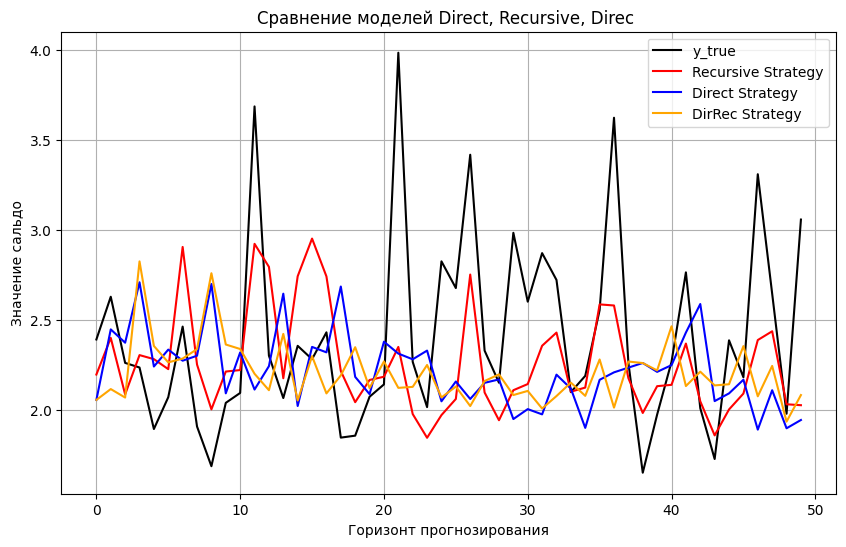

In [243]:
plt.figure(figsize=(10, 6))

plt.plot(y_test.values, color='black', label='y_true')
plt.plot(recur_pred.values, color='red', label='Recursive Strategy')
plt.plot(dir_pred.values, color='blue', label='Direct Strategy')
plt.plot(dirrec_pred.values, color='orange', label='DirRec Strategy')

plt.title('Сравнение моделей Direct, Recursive, Direc ')
plt.xlabel('Горизонт прогнозирования')
plt.ylabel('Значение сальдо')
plt.legend()
plt.grid();

In [235]:
pd.DataFrame({'Model':['Direct Prediction', 'Recursive Prediction', 'DirRec Prediction'], 'WAPE':[WAPE(y_test.values, dir_pred.values)[0], 
                      WAPE(y_test.values, recur_pred.values)[0],
                      WAPE(y_test.values, dirrec_pred.values)[0]
                      ]}
                      ).set_index('Model')

,WAPE
Model,
Direct Prediction,0.194042
Recursive Prediction,0.149295
DirRec Prediction,0.197278


##### Рубрика "как вам домашка?" (0.1 балла)

Пройдите короткий опрос. Это действительно важно. https://forms.gle/eKQTEKbYKD9YripL8